In [2]:
#Question 4c
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#the values were put according to hwat i found earlier (the differentiation)
def f(x):
    x = np.asarray(x)
    if x < 1:
        return 25*x**2
    elif x <= 2:
        return x**2 + 48*x - 24
    else:
        return 25*x**2 - 48*x + 72

def df(x):
    if x < 1:
        return 50*x
    elif x <= 2:
        return 2*x + 48
    else:
        return 50*x - 48


In [4]:
#gradient descent
def gradient_descent(x0, alpha=1/50, max_iters=2000, tol=1e-10):
    x = x0
    xs = [x]
    fs = [f(x)]
    for k in range(max_iters):
        g = df(x)
        x = x - alpha * g
        xs.append(x); fs.append(f(x))
        if abs(g) <= tol:
            break
    return np.array(xs), np.array(fs)

In [5]:
#CHATGPT refined this answer cause i was getting a lot of error

def heavy_ball(x0, alpha=1/18.0, beta=4/9.0, max_iters=2000, tol=1e-10):
    x = x0
    x_prev = x0
    xs = [x]
    fs = [f(x)]
    
    v = 0.0
    for k in range(max_iters):
        g = df(x)
        v_new = beta * v + alpha * g  
        x_new = x - alpha * g + beta * (x - x_prev)
        x_prev, x = x, x_new
        v = v_new
        xs.append(x); fs.append(f(x))
        if abs(df(x)) <= tol:
            break
    return np.array(xs), np.array(fs)

def nesterov(x0, alpha=1/50.0, max_iters=2000, tol=1e-10):
    x = x0
    y = x0
    xs = [x]
    fs = [f(x)]
    for k in range(1, max_iters+1):
        beta = (k-1)/(k+2)
        grad_y = df(y)
        x_next = y - alpha * grad_y
        y = x_next + beta * (x_next - x)
        x = x_next
        xs.append(x); fs.append(f(x))
        if abs(df(x)) <= tol:
            break
    return np.array(xs), np.array(fs)



In [6]:
x0 = 2.2

#starting from here.
xs_gd, fs_gd = gradient_descent(x0, alpha=1/50, max_iters=2000, tol=1e-12)
xs_hb, fs_hb = heavy_ball(x0, alpha=1/18.0, beta=4/9.0, max_iters=2000, tol=1e-12)
xs_n, fs_n = nesterov(x0, alpha=1/50.0, max_iters=2000, tol=1e-12)

In [7]:
#iteration counts
print("GD iterations:", len(xs_gd)-1)
print("Heavy Ball iterations:", len(xs_hb)-1)
print("Nesterov iterations:", len(xs_n)-1)

GD iterations: 3
Heavy Ball iterations: 86
Nesterov iterations: 2


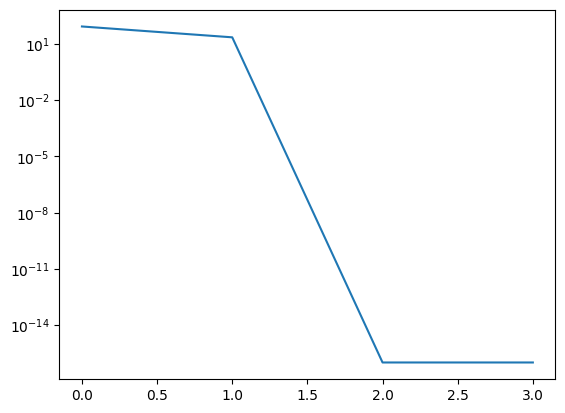

In [8]:
plt.semilogy(fs_gd - min(fs_gd.min(), fs_hb.min(), fs_n.min()) + 1e-16, label='Gradient Descent')

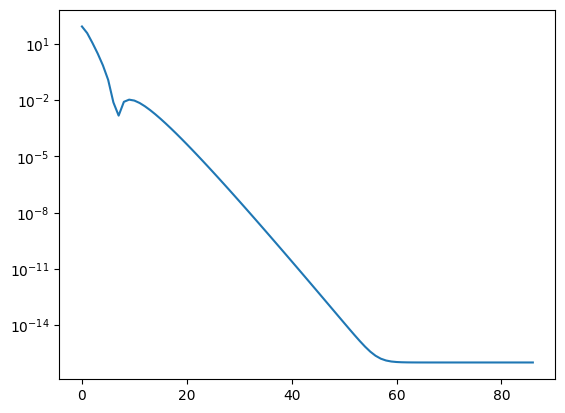

In [9]:
plt.semilogy(fs_hb - min(fs_gd.min(), fs_hb.min(), fs_n.min()) + 1e-16, label='Heavy Ball')

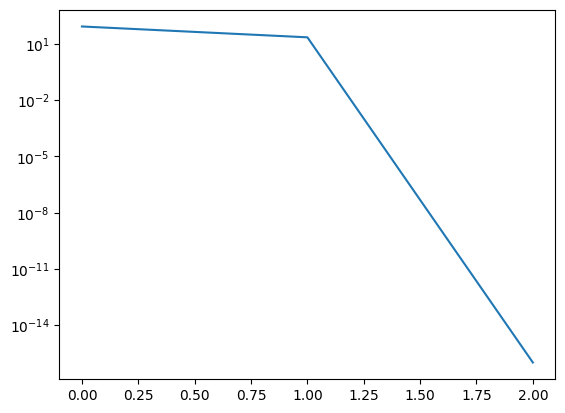

In [10]:
plt.semilogy(fs_n - min(fs_gd.min(), fs_hb.min(), fs_n.min()) + 1e-16, label='Nesterov')


In [11]:
import numpy as np
from sklearn import datasets
#dataset (given in question)
np.random.seed(2020)
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=6.0)

#adding bias
X_aug = np.hstack([X, np.ones((X.shape[0], 1))])

def sigmoid(t):
    out = np.zeros_like(t)
    positive = t >= 0
    out[positive] = 1 / (1 + np.exp(-t[positive]))
    out[~positive] = np.exp(t[~positive]) / (1 + np.exp(t[~positive]))
    return out

def log_likelihood(theta, X, y):
    t = X @ theta
    return np.sum(y * t - np.log(1 + np.exp(t)))

def grad(theta, X, y):
    t = X @ theta
    return X.T @ (y - sigmoid(t))
#gradient descent parameters
alpha = 1e-3          # step size, given in question
theta = np.zeros(X_aug.shape[1])
tolerance = 1e-5
max_iter = 100000



In [12]:
for i in range(max_iter):
    gradient = grad(theta, X_aug, y)
    theta_new = theta + alpha * gradient
    if np.linalg.norm(theta_new - theta) < tolerance:
        print(f"Converged in {i+1} iterations.")
        break
    theta = theta_new
else:
    print("Did not converge within max iterations.")

print("Final parameters θ = ", theta)

#predicitons (to test accuracy)
pred_probs = sigmoid(X_aug @ theta)
pred_labels = (pred_probs >= 0.5).astype(int)
accuracy = np.mean(pred_labels == y)
print(f"Training accuracy: {accuracy:.4f}")


Converged in 2700 iterations.
Final parameters θ =  [-0.28047996 -0.45703359  2.20892123]
Training accuracy: 0.9100


In [13]:
def bisection_alpha(theta, grad_vec, X, y, left=0, right=1, tol=1e-4, max_iter=30):
    
    def directional_derivative(alpha):
        new_theta = theta + alpha * grad_vec
        return np.dot(grad(new_theta, X, y), grad_vec)

    total_bisection_iters = 0
    for _ in range(max_iter):
        total_bisection_iters += 1
        mid = (left + right) / 2
        val = directional_derivative(mid)
        if abs(val) < tol:
            break
        if val > 0:
            left = mid
        else:
            right = mid
    return (left + right) / 2, total_bisection_iters

theta = np.zeros(X_aug.shape[1])
tolerance = 1e-5
max_iter = 10000
total_bisections = 0

for i in range(max_iter):
    g = grad(theta, X_aug, y)
    alpha, bis_iters = bisection_alpha(theta, g, X_aug, y)
    total_bisections += bis_iters
    theta_new = theta + alpha * g
    if np.linalg.norm(theta_new - theta) < tolerance:
        print(f"Converged in {i+1} iterations (main GD loop).")
        break    theta = theta_new
else:
    print("Did not converge within max iterations.")

print("Final θ =", theta)
print(f"Total bisection iterations = {total_bisections}")

pred_probs = sigmoid(X_aug @ theta)
pred_labels = (pred_probs >= 0.5).astype(int)
accuracy = np.mean(pred_labels == y)
print(f"Training accuracy: {accuracy:.4f}")


SyntaxError: invalid syntax (3691154864.py, line 32)

In [ ]:
# Problem 6 implementation and experiments
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


#ddefining the   f, grad, hessian (as done)
def f_vec(x):
    x1, x2 = x[0], x[1]
    g1 = np.exp(x1 + 3*x2 - 0.1)
    g2 = np.exp(x1 - 3*x2 - 0.1)
    g3 = np.exp(-x1 - 0.1)
    return g1 + g2 + g3

def gradf(x):
    x1, x2 = x[0], x[1]
    g1 = np.exp(x1 + 3*x2 - 0.1)
    g2 = np.exp(x1 - 3*x2 - 0.1)
    g3 = np.exp(-x1 - 0.1)
    grad = np.array([g1 + g2 - g3,
                     3*g1 - 3*g2])
    return grad

def hessianf(x):
    x1, x2 = x[0], x[1]
    g1 = np.exp(x1 + 3*x2 - 0.1)
    g2 = np.exp(x1 - 3*x2 - 0.1)
    g3 = np.exp(-x1 - 0.1)
    H = np.array([[g1 + g2 + g3, 3*g1 - 3*g2],
                  [3*g1 - 3*g2, 9*(g1 + g2)]])
    return H



In [ ]:
#stopping criteria 
def stop_crit(grad, tol):
    return np.linalg.norm(grad) <= tol

# (a) Gradient Descent
def gd(f, gradf, x0, tol=1e-5, alpha=0.05, max_iters=10000):
    x = np.array(x0, dtype=float)
    traj = [x.copy()]
    for k in range(max_iters):
        g = gradf(x)
        if stop_crit(g, tol):
            break
        x = x - alpha * g
        traj.append(x.copy())
    return np.array(traj)

# (b) Heavy Ball
def heavyball(f, gradf, x0, tol=1e-5, alpha=0.05, beta=0.7, max_iters=10000):
    x = np.array(x0, dtype=float)
    x_prev = x.copy()
    traj = [x.copy()]
    # start with a forward step for x_prev (or keep x_prev==x to have zero momentum)
    for k in range(max_iters):
        g = gradf(x)
        if stop_crit(g, tol):
            break
        if k == 0:
            x_new = x - alpha * g
        else:
            x_new = x - alpha * g + beta * (x - x_prev)
        x_prev, x = x, x_new
        traj.append(x.copy())
    return np.array(traj)

# (c) Nesterov
def nesterov(f, gradf, x0, tol=1e-5, alpha=0.05, max_iters=10000):
    x = np.array(x0, dtype=float)
    y = x.copy()
    traj = [x.copy()]
    for k in range(1, max_iters+1):
        grad_y = gradf(y)
        if stop_crit(grad_y, tol):
            break
        x_next = y - alpha * grad_y
        beta = (k-1)/(k+2)
        y = x_next + beta * (x_next - x)
        x = x_next
        traj.append(x.copy())
    return np.array(traj)

# (d) Newton's method (pure Newton step, step size 1)
def newton(f, gradf, hessianf, x0, tol=1e-5, max_iters=10000):
    x = np.array(x0, dtype=float)
    traj = [x.copy()]
    for k in range(max_iters):
        g = gradf(x)
        if stop_crit(g, tol):
            break
        H = hessianf(x)
        try:
            dx = np.linalg.solve(H, g)  # solve H * dx = g
        except np.linalg.LinAlgError:
            # fallback to pseudo-inverse if Hessian is singular
            dx = np.linalg.pinv(H) @ g
        x = x - dx  # Newton step: x <- x - H^{-1} g
        traj.append(x.copy())
    return np.array(traj)



In [ ]:
#experimentation
x0 = np.array([-0.45, 0.35])
tol = 1e-5

traj_gd = gd(f_vec, gradf, x0, tol=tol, alpha=0.05, max_iters=10000)
traj_hb = heavyball(f_vec, gradf, x0, tol=tol, alpha=0.05, beta=0.7, max_iters=10000)
traj_nes = nesterov(f_vec, gradf, x0, tol=tol, alpha=0.05, max_iters=10000)
traj_new = newton(f_vec, gradf, hessianf, x0, tol=tol, max_iters=10000)

print("Iterations to tol=1e-5:")
print("GD:", len(traj_gd)-1)
print("Heavy Ball:", len(traj_hb)-1)
print("Nesterov:", len(traj_nes)-1)
print("Newton:", len(traj_new)-1)



Iterations to tol=1e-5:
GD: 78
Heavy Ball: 62
Nesterov: 61
Newton: 4


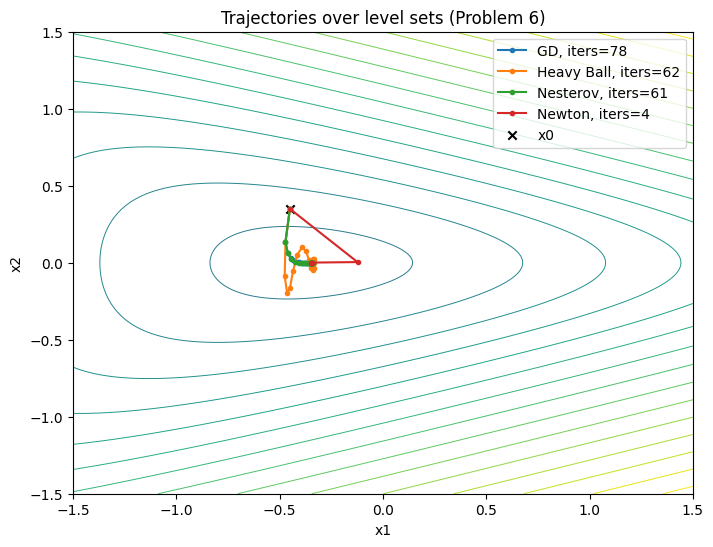

In [ ]:
# plots 
x1 = np.linspace(-1.5, 1.5, 300)
x2 = np.linspace(-1.5, 1.5, 300)
X1, X2 = np.meshgrid(x1, x2)
Z = np.exp(X1 + 3*X2 - 0.1) + np.exp(X1 - 3*X2 - 0.1) + np.exp(-X1 - 0.1)

plt.figure(figsize=(8,6))
levels = np.logspace(-1, 2.5, 25)
plt.contour(X1, X2, Z, levels=levels, norm=LogNorm(), linewidths=0.7)
# trajectories
plt.plot(traj_gd[:,0], traj_gd[:,1], '-o', markersize=3, label=f'GD, iters={len(traj_gd)-1}')
plt.plot(traj_hb[:,0], traj_hb[:,1], '-o', markersize=3, label=f'Heavy Ball, iters={len(traj_hb)-1}')
plt.plot(traj_nes[:,0], traj_nes[:,1], '-o', markersize=3, label=f'Nesterov, iters={len(traj_nes)-1}')
plt.plot(traj_new[:,0], traj_new[:,1], '-o', markersize=3, label=f'Newton, iters={len(traj_new)-1}')
plt.scatter([x0[0]],[x0[1]], color='k', marker='x', label='x0')
plt.xlabel('x1'); plt.ylabel('x2'); plt.title('Trajectories over level sets (Problem 6)')
plt.legend()
plt.show()


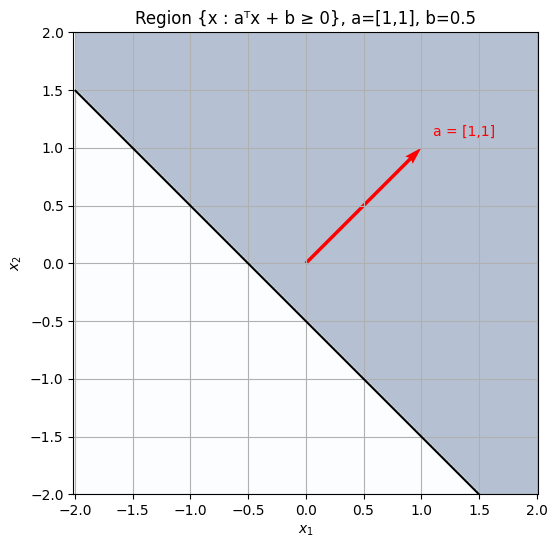

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid
x1 = np.linspace(-2, 2, 200)
x2 = np.linspace(-2, 2, 200)
X1, X2 = np.meshgrid(x1, x2)

# Inequality region: a^T x + b >= 0 → X1 + X2 + 0.5 >= 0
region = X1 + X2 + 0.5 >= 0

plt.figure(figsize=(6,6))
plt.contour(X1, X2, X1 + X2 + 0.5, levels=[0], colors='k')  # boundary line
plt.imshow(region, extent=[-2,2,-2,2], origin='lower', alpha=0.3, cmap='Blues')

# Plot normal vector 'a'
plt.quiver(0, 0, 1, 1, angles='xy', scale_units='xy', scale=1, color='r')
plt.text(1.1, 1.1, 'a = [1,1]', color='r')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Region {x : aᵀx + b ≥ 0}, a=[1,1], b=0.5')
plt.grid(True)
plt.axis('equal')
plt.show()


In [14]:
#QUESTION 2

import numpy as np
from sklearn import datasets

np.random.seed(2020)
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=6.0)

# Convert y from {0, 1} → {-1, 1}
y = 2 * y - 1

# Add bias term (intercept)
X = np.hstack([np.ones((X.shape[0], 1)), X])

print(X.shape, y.shape)


(100, 3) (100,)


In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def f(w, X, y):
    z = y * (X @ w)
    return np.mean(np.log(1 + np.exp(-z)))

def grad_f(w, X, y):
    z = y * (X @ w)
    g = -(y * X.T @ (1 - sigmoid(z))) / len(y)
    return g

def hess_f(w, X, y):
    z = y * (X @ w)
    s = sigmoid(z)
    D = np.diag((s * (1 - s)))
    H = (X.T @ D @ X) / len(y)
    return H


In [16]:
def gradient_descent_backtracking(X, y, w0, max_iters=1000, tol=1e-6, rho=0.5, c1=1e-4):
    w = w0.copy()
    fs = [f(w, X, y)]
    total_line_iters = 0

    for k in range(max_iters):
        g = grad_f(w, X, y)
        if np.linalg.norm(g) < tol:
            break
        p = -g
        # backtracking search
        line_iters = 0
        alpha = 1
        while f(w + alpha * p, X, y) > f(w, X, y) + c1 * alpha * np.dot(g, p):
            alpha *= rho
            line_iters += 1
        total_line_iters += line_iters
        w = w + alpha * p
        fs.append(f(w, X, y))

    return w, np.array(fs), k+1, total_line_iters


In [17]:
def heavy_ball(X, y, w0, alpha=0.001, beta=0.95, max_iters=2000, tol=1e-6):
    w = w0.copy()
    w_prev = w.copy()
    fs = [f(w, X, y)]

    for k in range(max_iters):
        g = grad_f(w, X, y)
        if np.linalg.norm(g) < tol:
            break
        w_new = w - alpha * g + beta * (w - w_prev)
        w_prev, w = w, w_new
        fs.append(f(w, X, y))

    return w, np.array(fs), k+1


In [18]:
def heavy_ball_backtracking(X, y, w0, beta=0.95, rho=0.5, c1=1e-4, max_iters=2000, tol=1e-6):
    w = w0.copy()
    w_prev = w.copy()
    fs = [f(w, X, y)]

    for k in range(max_iters):
        g = grad_f(w, X, y)
        if np.linalg.norm(g) < tol:
            break
        p = -g + beta * (w - w_prev)
        alpha = 1
        while f(w + alpha * p, X, y) > f(w, X, y) + c1 * alpha * np.dot(g, p):
            alpha *= rho
        w_new = w + alpha * p
        w_prev, w = w, w_new
        fs.append(f(w, X, y))
    return w, np.array(fs), k+1


In [19]:
def nesterov(X, y, w0, alpha=0.001, max_iters=2000, tol=1e-6):
    w = w0.copy()
    yk = w.copy()
    fs = [f(w, X, y)]

    for k in range(1, max_iters+1):
        g = grad_f(yk, X, y)
        w_next = yk - alpha * g
        beta = (k - 1) / (k + 2)
        yk = w_next + beta * (w_next - w)
        w = w_next
        fs.append(f(w, X, y))
        if np.linalg.norm(g) < tol:
            break
    return w, np.array(fs), k


In [20]:
def newton_method(X, y, w0, max_iters=100, tol=1e-6, rho=0.5, c1=1e-4):
    w = w0.copy()
    fs = [f(w, X, y)]

    for k in range(max_iters):
        g = grad_f(w, X, y)
        H = hess_f(w, X, y)
        if np.linalg.norm(g) < tol:
            break
        p = -np.linalg.solve(H, g)
        alpha = 1
        while f(w + alpha * p, X, y) > f(w, X, y) + c1 * alpha * np.dot(g, p):
            alpha *= rho
        w = w + alpha * p
        fs.append(f(w, X, y))
    return w, np.array(fs), k+1


In [21]:
w0 = np.zeros(X.shape[1])

# Run each solver
w_gd, fs_gd, k_gd, bt_gd = gradient_descent_backtracking(X, y, w0)
w_hb, fs_hb, k_hb = heavy_ball(X, y, w0)
w_hb_bt, fs_hb_bt, k_hb_bt = heavy_ball_backtracking(X, y, w0)
w_nes, fs_nes, k_nes = nesterov(X, y, w0)
w_newton, fs_newton, k_newton = newton_method(X, y, w0)

print(f"GD iterations: {k_gd}, backtracking steps: {bt_gd}")
print(f"Heavy Ball (fixed): {k_hb}")
print(f"Heavy Ball (backtracking): {k_hb_bt}")
print(f"Nesterov: {k_nes}")
print(f"Newton: {k_newton}")


GD iterations: 920, backtracking steps: 875
Heavy Ball (fixed): 2000
Heavy Ball (backtracking): 136
Nesterov: 2000
Newton: 8


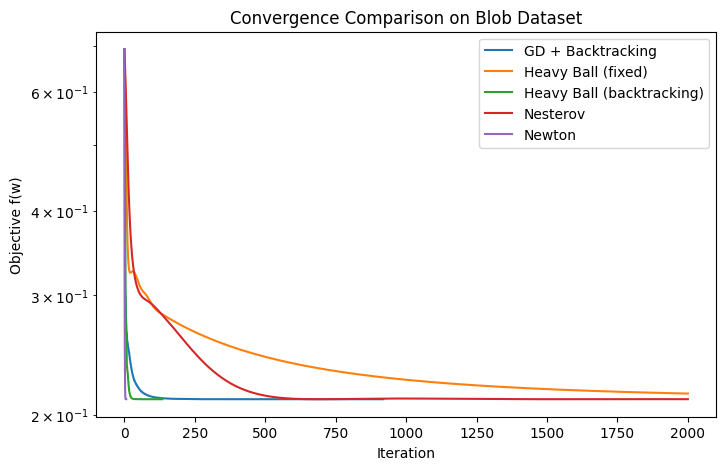

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(fs_gd, label='GD + Backtracking')
plt.plot(fs_hb, label='Heavy Ball (fixed)')
plt.plot(fs_hb_bt, label='Heavy Ball (backtracking)')
plt.plot(fs_nes, label='Nesterov')
plt.plot(fs_newton, label='Newton')
plt.xlabel('Iteration')
plt.ylabel('Objective f(w)')
plt.yscale('log')
plt.legend()
plt.title('Convergence Comparison on Blob Dataset')
plt.show()


In [23]:
preds = np.sign(X @ w_newton)
acc = np.mean(preds == y)
print("Accuracy (Newton):", acc)


Accuracy (Newton): 0.91


In [1]:
#HOMEWORK 7 AND 8

In [2]:
#Question 4

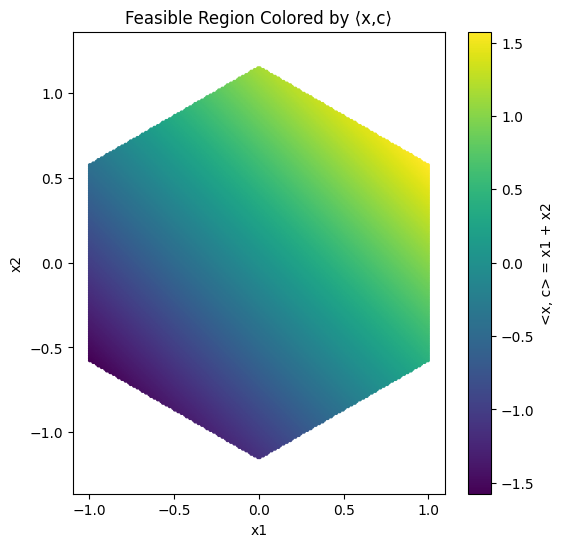

Approx minimizer: [-0.99749373 -0.5764411 ]


In [ ]:
#PART A
import numpy as np
import matplotlib.pyplot as plt
# define c
c = np.array([1.0, 1.0])
# create a_m and b_m
a_list = []
b_list = []
for m in range(1, 7):
    a = np.array([np.cos(m*np.pi/3), np.sin(m*np.pi/3)])
    a_list.append(a)
    b_list.append(1)
# grid for plotting
xs = np.linspace(-2, 2, 400)
ys = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(xs, ys)
points = np.vstack([X.ravel(), Y.ravel()]).T

# feasible mask
mask = np.ones(len(points), dtype=bool)
for a, b in zip(a_list, b_list):
    mask &= (points @ a <= b)
feasible_points = points[mask]

# compute <x, c>
obj_vals = feasible_points @ c

plt.figure(figsize=(6,6))
plt.scatter(feasible_points[:,0], feasible_points[:,1], 
            c=obj_vals, cmap='viridis', s=3)
plt.colorbar(label="<x, c> = x1 + x2")
plt.title("Feasible Region Colored by ⟨x,c⟩")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.show()
print("Approx minimizer:", feasible_points[np.argmin(obj_vals)])


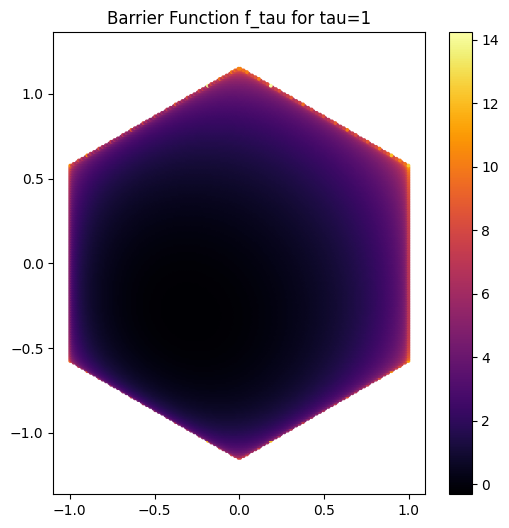

In [8]:
#code for part b

def barrier_obj(x, tau):
    val = x @ c
    for a, b in zip(a_list, b_list):
        val -= (1/tau) * np.log(b - x @ a)
    return val

# plot for tau = 1
tau = 1
vals = np.full(len(points), np.nan)

for i, p in enumerate(points):
    ok = True
    for a, b in zip(a_list, b_list):
        if p @ a >= b:
            ok = False
            break
    if ok:
        vals[i] = barrier_obj(p, tau)

plt.figure(figsize=(6,6))
plt.scatter(points[:,0], points[:,1], c=vals, 
            cmap='inferno', s=3)
plt.title("Barrier Function f_tau for tau=1")
plt.colorbar()
plt.axis("equal")
plt.show()


In [9]:
#LOOK IT'S SHOWING steep "walls" on the boundary AS THE  barrier goes to infinity.

tau=1, solution=[-0.29108713 -0.2899053 ], iterations=76
tau=10, solution=[-0.80058994 -0.59492243], iterations=743
tau=100, solution=[-0.97663571 -0.58088042], iterations=161
tau=500, solution=[-0.99527928 -0.57807749], iterations=423
tau=1000, solution=[-0.99763679 -0.5777151 ], iterations=827


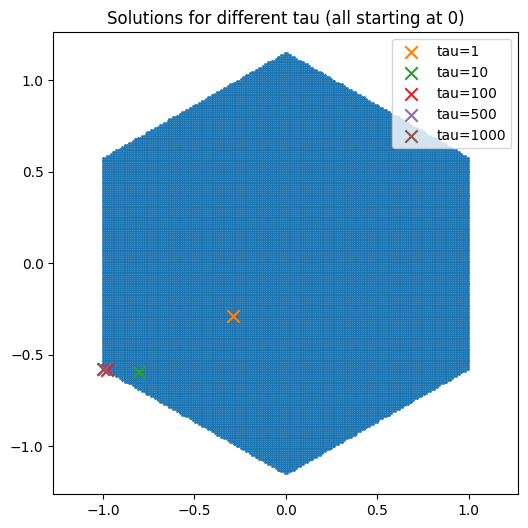

In [ ]:
#part c for codeing
def grad_f(x, tau):
    g = c.copy()
    for a, b in zip(a_list, b_list):
        g += (1/tau) * (a / (b - x @ a))
    return g

def backtracking_gd(tau, x0=np.array([0.,0.]), max_iter=10000):
    x = x0.copy()
    iters = 0
    c1 = 0.001
    rho = 0.8

    while iters < max_iter:
        g = grad_f(x, tau)
        f_x = barrier_obj(x, tau)
        alpha = 1.0

        # backtracking loop
        while True:
            x_new = x - alpha * g
            feasible = True
            for a, b in zip(a_list, b_list):
                if x_new @ a >= b:      # outside region
                    feasible = False
                    break
            if not feasible:
                alpha *= rho
                continue

            if barrier_obj(x_new, tau) <= f_x - c1 * alpha * np.dot(g,g):
                break
            alpha *= rho
        
        x = x_new
        iters += 1

        # stopping condition
        if np.linalg.norm(g) < 1e-6:
            break

    return x, iters

taus = [1, 10, 100, 500, 1000]
solutions = []
iterations = []

for tau in taus:
    x_sol, iters = backtracking_gd(tau)
    solutions.append(x_sol)
    iterations.append(iters)
    print(f"tau={tau}, solution={x_sol}, iterations={iters}")

# plot feasible region + solutions
plt.figure(figsize=(6,6))
plt.scatter(feasible_points[:,0], feasible_points[:,1], s=1)

for x_sol, tau in zip(solutions, taus):
    plt.scatter(x_sol[0], x_sol[1], s=80, marker='x', label=f"tau={tau}")

plt.legend()
plt.title("Solutions for different tau (all starting at 0)")
plt.axis("equal")
plt.show()


In [11]:
#part d

taus = [1, 10, 100, 500, 1000]
solutions_ws = []
iterations_ws = []

x_init = np.array([0.,0.])

for tau in taus:
    x_sol, iters = backtracking_gd(tau, x_init)
    solutions_ws.append(x_sol)
    iterations_ws.append(iters)
    print(f"[Warm start] tau={tau}, solution={x_sol}, iterations={iters}")
    x_init = x_sol  # warm start for next tau


[Warm start] tau=1, solution=[-0.29108713 -0.2899053 ], iterations=76
[Warm start] tau=10, solution=[-0.80058994 -0.59492243], iterations=739
[Warm start] tau=100, solution=[-0.97663572 -0.58088042], iterations=123
[Warm start] tau=500, solution=[-0.99527928 -0.57807749], iterations=104
[Warm start] tau=1000, solution=[-0.99763679 -0.5777151 ], iterations=77


In [12]:
#Question 6

In [14]:
import numpy as np

# ================================================================
# Problem setup
# ================================================================
m = 40
n = 15
np.random.seed(202503)
A = np.random.randn(m, n)
y = np.random.randn(m)

# ================================================================
# (a) Projected Gradient Descent for NNLS
# ================================================================
def projected_gd(A, y, alpha=1e-3, tol=1e-6, maxiter=5000):
    x = np.zeros(A.shape[1])
    for k in range(maxiter):
        grad = A.T @ (A @ x - y)
        x_new = x - alpha * grad
        x_new = np.maximum(0, x_new)

        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x


# Compute primal solution by projected GD
x_pgd = projected_gd(A, y)


# ================================================================
# (c,d,e) Dual projected gradient ascent
# ================================================================
def dual_projected_g_ascent(A, y, eta=1e-3, tol=1e-6, maxiter=5000):
    Q = A.T @ A
    Qinv = np.linalg.inv(Q)
    ATy = A.T @ y

    lam = np.zeros_like(ATy)

    for k in range(maxiter):
        grad = -Qinv @ (ATy + lam)           # ∇d(λ)
        lam_new = lam + eta * grad            # gradient ascent
        lam_new = np.maximum(0, lam_new)      # projection λ ≥ 0

        if np.linalg.norm(lam_new - lam) < tol:
            break
        lam = lam_new

    # Recover primal: x* = (A^T A)^(-1)(A^T y + λ*)
    x = Qinv @ (ATy + lam)
    x = np.maximum(0, x)
    return lam, x


lam_d, x_d = dual_projected_g_ascent(A, y)


# ================================================================
# (f) Verify strong duality
# ================================================================
# primal objective
primal_val = 0.5 * np.linalg.norm(y - A @ x_d)**2

# compute dual objective:
# d(λ) = -0.5 (A^T y + λ)^T (A^T A)^(-1)(A^T y + λ) + 0.5||y||^2
Q = A.T @ A
Qinv = np.linalg.inv(Q)
z = A.T @ y + lam_d
dual_val = -0.5 * z.T @ (Qinv @ z) + 0.5 * np.dot(y, y)

print("\n===============================")
print("Strong Duality Check:")
print("Primal objective =", primal_val)
print("Dual objective   =", dual_val)
print("Difference       =", abs(primal_val - dual_val))


# ================================================================
# (g) Verify KKT Conditions
# ================================================================
# 1. Primal feasibility: x ≥ 0
primal_feasible = np.all(x_d >= -1e-9)

# 2. Dual feasibility: λ ≥ 0
dual_feasible = np.all(lam_d >= -1e-9)

# 3. Complementary slackness: x_i λ_i = 0
comp_slack = np.linalg.norm(x_d * lam_d)

# 4. Stationarity: A^T(Ax - y) - λ = 0
stationarity = np.linalg.norm(A.T @ (A @ x_d - y) - lam_d)

print("\n===============================")
print("KKT VERIFICATION")
print("Primal feasible       =", primal_feasible)
print("Dual feasible         =", dual_feasible)
print("Complementary slack   =", comp_slack)
print("Stationarity residual =", stationarity)
print("===============================")



Strong Duality Check:
Primal objective = 18.985593827808685
Dual objective   = 13.974615548372848
Difference       = 5.010978279435838

KKT VERIFICATION
Primal feasible       = True
Dual feasible         = True
Complementary slack   = 0.0
Stationarity residual = 25.481342255073788
